Marina Dunn

PHYS 243: Foundations of Machine Learning

Assignment 1

Created 10/6/21

M.S. Engineering - Data Science, UCR

### Problem 1: Fibonacci


Production of Fibonacci Sequence!
Write a function that takes an integer value n, where n ∈ [0, 1, 2, 3, ...] and return the nth value in Fibonacci sequence. The function recursively and the function with for loops are both shown below. Which is faster?

##### Part 1: Rewrite the function with for loop.



In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# original function

def fib_rec(n=0):
    if n==0:
        return 1
    elif n==1:
        return 1
    else:
        return fib_rec(n - 1) + fib_rec(n - 2)

In [4]:
# re-written function with for loop

def fib_for(n):
    n1, n2 = 0, 1
    if n == 0:
        return 0
    for i in range(n-1):
        n1 = n2
        n2 = n1 + n2    
        return n2

##### Part 2: Which function is actually faster? (Explain without running the codes)
    
    

In this case, iteration would be faster than recursion because with recursion, the values aren't being stored and remembered, so previous values have to be calculated once again for every future 'n'. The iterative version conveniently has both of the previous values to quickly calculate the new sum from. In order for the recursive version to be more efficient, you would need to implement some step to store the previous value so it doesn't have to be re-calculated every time. 

##### Part 3: Write a code to time the average time for k times function call. A function that takes three arguments (function to time (Fib rec), input of the function (n), num- ber of runs(k)) and run the Fib rec function k times for the input of n and returns the average time. Tip: You can use the time module in the python.


In [5]:
def timer1(n, k, f=fib_rec):
    start = time.time()
    for i in range(k):
        f(n)
    end = time.time()
    average_time1 = (end - start) / k
    return average_time1

print(f'Average time for recursion: {timer1(10, 20, fib_rec)} seconds')

def timer2(n, k, f=fib_for):
    start = time.time()
    for i in range(k):
        f(n)
    end = time.time()
    average_time2 = (end - start) / k
    return average_time2

print(f'Average time for iteration method: {timer2(10, 20, fib_for)} seconds')

Average time for recursion: 2.759695053100586e-05 seconds
Average time for iteration method: 5.960464477539062e-07 seconds


#####  Part 4: Make a plot in which the x-axis is the value of the input function n and the y-axis is the average time (output of the previous function), for both recursive and non- recursive Fibonacci. (Both in the same plot; also use matplotlib package for making the plots)


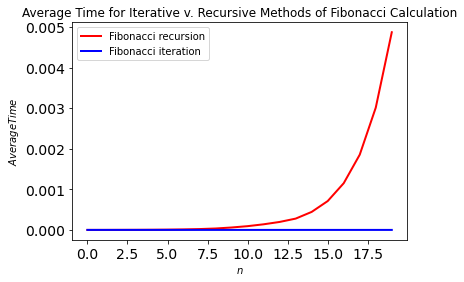

In [6]:
%matplotlib inline
#plt.style.use('seaborn')

n = np.arange(0,20)

fib_rec_time = [timer1(i, k=50, f=fib_rec) for i in n]
fib_for_time = [timer2(i, k=50, f=fib_for) for i in n]

plt.plot(n, fib_rec_time, linewidth=2, color='red', label='Fibonacci recursion')
plt.plot(n, fib_for_time, linewidth=2, color='blue', label='Fibonacci iteration')

plt.title(r"Average Time for Iterative v. Recursive Methods of Fibonacci Calculation")

plt.xlabel(r"$n$")
plt.ylabel(r"$Average Time$")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='upper left')
plt.show()

### Problem 2: Linear Algebra

Given the Matrix M below answer the questions:

##### Part 1: Find the determinant, transpose, inverse(if exist) for M.
<center> M = </center>

\begin{bmatrix} 
1 & -4 & 2 \\
-4 & 1 & -2\\
2 & -2 & -2 \\
\end{bmatrix}

How to find determinant of 3x3 matrix:

<center> M = </center>
\begin{bmatrix} 
a & b & c \\
d & e & f\\
g & h & i \\
\end{bmatrix}
<br>

<center> |M| = a(ei − fh) − b(di − fg) + c(dh − eg) </center>


In [7]:
# 1: Find determinant
det_M = (1 * (1*-2 - (-2*-2)) ) - (-4 * ((-4*-2) - (-2*2))) + (2* ((-4*-2) - (1*2) ))
print("Determinant of matrix M:")
print(int(det_M))


Determinant of matrix M:
54


In [8]:
# Faster version using numpy
M = np.array([[1, -4, 2], [-4, 1,-2],[2, -2, -2]])
determinant = np.linalg.det(M)
  
print("Determinant of matrix M:")
print(int(determinant))

Determinant of matrix M:
54


In [9]:
# 2: Find transpose, where row values and column values interchange
# using nested list comprehension

M = [[1, -4, 2], [-4, 1,-2],[2, -2, -2]]

# N is the dimensions of the matrix
N = 3

MT = [[M[j][i] for j in range(N)] for i in range(N)]

print("Transpose of M: ")
for row in MT:
    print(row)
    
print("\n M = MT. The values have switched but appear the same. \nThis means the matrix is orthogonal.")

Transpose of M: 
[1, -4, 2]
[-4, 1, -2]
[2, -2, -2]

 M = MT. The values have switched but appear the same. 
This means the matrix is orthogonal.


In [10]:
# Faster version using numpy
M = np.array([[1, -4, 2], [-4, 1,-2],[2, -2, -2]])
print("Transpose of M: ")
print(np.transpose(M))

Transpose of M: 
[[ 1 -4  2]
 [-4  1 -2]
 [ 2 -2 -2]]


In [16]:
#3: Find inverse of matrix M (if exist)

inverse of M = adj(M)/det(M)

determinant must not be 0

1. change signs of appropriate values
2. transpose matrix
3. multiply by 1/det, in this case, 54


In [12]:
inverse = np.linalg.inv(M)
print("Inverse of M: ")
print(inverse)

Inverse of M: 
[[-0.11111111 -0.22222222  0.11111111]
 [-0.22222222 -0.11111111 -0.11111111]
 [ 0.11111111 -0.11111111 -0.27777778]]


##### Part 2: Find the eigenvalues and eigenvectors for M.
##### find the values that satisfy det(M − λI) = 0?

M − λI = 
\begin{array}{ccc}1-\lambda &-4&2\\-4&1-\lambda &-2\\2&-2&-2-\lambda \end{array}
<br>
<center> M = </center>
\begin{bmatrix} 
a & b & c \\
d & e & f\\
g & h & i \\
\end{bmatrix}
<br>

<center> |M| = a(ei − fh) − b(di − fg) + c(dh − eg) </center>

In [13]:
# Find eigenvalues and eigenvectors of M 
# Faster version using numpy
from numpy import linalg as LA
'''
det(M - λI) = 0

(1-λ)[(1-λ)(-2-λ) - (-2*-2)] + 4[(-4)*(-2-λ) - (-2*2)] + 2[(-4)(1-λ) - (1-λ)(2)] = 0
(1-λ)[(-2-λ+2λ+λ**2) - 4] + 4[(8+λ)+4] + 2[(-4+4λ)-2+2λ] = 0
(1-λ)(-6 + λ + λ**2) + (48 + λ) + 2(-6 + 6λ) = 0
(-6 + λ + λ**2 + 6λ - λ**2 - λ**3) + (48 + λ) + (-12 + 12λ) = 0
(-6 + 7λ - λ**3) + 36 + 11λ = 0
30 + 18λ - λ**3 = 0

'''

M = np.array([[1, -4, 2], [-4, 1,-2],[2, -2, -2]])

w, v = np.linalg.eig(M)
print("Eigenvalues: ")
print(w)
print("\n Eigenvectors: ")
print(v)

Eigenvalues: 
[-3.  6. -3.]

 Eigenvectors: 
[[-0.74535599 -0.66666667 -0.16169042]
 [-0.59628479  0.66666667  0.30721179]
 [ 0.2981424  -0.33333333  0.93780442]]


##### Part 3: Find the Gradient if the ∇Af(A) for the following:

<center> A = </center>
\begin{bmatrix} 
x11 & x12 & x13 \\
x21 & x22 & x23\\
x31 & x32 & x33 \\
\end{bmatrix}
<br>

<center> f(A) = (x<sub>11</sub><sup>2</sup>x<sub>22</sub>x<sub>23</sub>) + (x<sub>11</sub>x<sub>12</sub>x<sub>13</sub>x<sub>31</sub>) - (x<sub>33</sub><sup>2</sup>x<sub>32</sub> x<sub>21</sub>) </center>

grad f =  < df/dx<sub>11</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>), 

df/dx<sub>12</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>),

df/dx<sub>13</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>),

df/dx<sub>21</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>),

df/dx<sub>22</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>),

df/dx<sub>23</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>),

df/dx<sub>31</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>),

df/dx<sub>32</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>),

df/dx<sub>33</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>) >

<br>
----------------------

df/dx<sub>11</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>) = 

2 x<sub>11</sub>x<sub>12</sub>x<sub>13</sub> + x<sub>12</sub>x<sub>13</sub>x<sub>31</sub>

<br>
-------

df/dx<sub>12</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>) = 

x<sub>11</sub>x<sub>13</sub>x<sub>31</sub>

<br>
-------

df/dx<sub>13</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>) = 

x<sub>11</sub>x<sub>12</sub>x<sub>31</sub>

<br>
-------

df/dx<sub>21</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>) = 

-2x<sub>33</sub>x<sub>32</sub>

<br>
-------

df/dx<sub>22</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>) = 

2x<sub>11</sub>x<sub>23</sub>

<br>
-------

df/dx<sub>23</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>) = 

x<sub>11</sub><sup>2</sup>x<sub>22</sub>

<br>
-------

df/dx<sub>31</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>) = 

x<sub>11</sub>x<sub>12</sub>x<sub>13</sub>

<br>
-------

df/dx<sub>32</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>) = 

-x<sub>33</sub><sup>2</sup>x<sub>21</sub>

<br>
-------

df/dx<sub>33</sub>(x<sub>11</sub>,x<sub>12</sub>,x<sub>13</sub>,x<sub>21</sub>,x<sub>22</sub>,x<sub>23</sub>,x<sub>31</sub>,x<sub>32</sub>,x<sub>33</sub>) = 

-2x<sub>33</sub>x<sub>32</sub>x<sub>21</sub>

<br>
-------


grad f = <2 x<sub>11</sub>x<sub>12</sub>x<sub>13</sub> + x<sub>12</sub>x<sub>13</sub>x<sub>31</sub>, x<sub>11</sub>x<sub>13</sub>x<sub>31</sub>, x<sub>11</sub>x<sub>12</sub>x<sub>31</sub>, -2x<sub>33</sub>x<sub>32</sub>, 2x<sub>11</sub>x<sub>23</sub>, x<sub>11</sub><sup>2</sup>x<sub>22</sub>, x<sub>11</sub>x<sub>12</sub>x<sub>13</sub>, -x<sub>33</sub><sup>2</sup>x<sub>21</sub>, -2x<sub>33</sub>x<sub>32</sub>x<sub>21</sub> >



\begin{bmatrix} 
2x11x12x13 + x12x13x31 & x11x13x31 & x11x12x31 \\
-2x33x32 & 2x11x23 & x11^2x22\\
x11x12x13 & -x33^2x21 & -2x33x32x21 \\
\end{bmatrix}
<br>

##### Part 4: Find the Hessian Matrix for g(x, y, z) = x**3y + yz sin(x) + xy**2z**5

In [15]:

# take second derivatives of g(x, y, z) = x**3y + yz sin(x) + xy**2z**5
'''
dg/dx = 3yx**2 + yz cos(x) + y**2z**5
d2g/dx2 = 6yx - yz sin(x)
d2g/dxdy = 3x**2 + z cos(x) + 2yz**5
d2g/dxdz = y cos(x) + 5y**2z**4

dg/dy = x**3 + z sin(x) + 2xyz**5
d2g/dy2 = 2xz**5
d2g/dydx = 3x**2 + z cos(x) + 2yz**5
d2g/dydz = sin(x) + 10xyz**4

dg/dz = y sin(x) + 5xy**2z**4
d2g/dz2 = 20xy**2z**3
d2g/dzdx = y cos(x) + 5y**2z**4
d2g/dzdy = sin(x) + 10xyz**4

Hg(x,y,z) = [[d2g/dx2, d2g/dydx, d2g/dzdx], [d2g/dxdy, d2g/dy2, d2g/dzdy], [d2g/dxdz, d2g/dydz, d2g/dz2]]
Hg = [[6xy-yzsin(x), 3x^2+zcos(x)+2yz^5, ycos(x)+5y^2z^4], [3x^2+zcos(x)+2yz^5, 2xz^5, sin(x)+10xyz^4], [ycos(x)+5y^2z^4, sin(x)+10xyz^4, 20xy^2z^3]]
'''

'\ndg/dx = 3yx**2 + yz cos(x) + y**2z**5\nd2g/dx2 = 6yx - yz sin(x)\nd2g/dxdy = 3x**2 + z cos(x) + 2yz**5\nd2g/dxdz = y cos(x) + 5y**2z**4\n\ndg/dy = x**3 + z sin(x) + 2xyz**5\nd2g/dy2 = 2xz**5\nd2g/dydx = 3x**2 + z cos(x) + 2yz**5\nd2g/dydz = sin(x) + 10xyz**4\n\ndg/dz = y sin(x) + 5xy**2z**4\nd2g/dz2 = 20xy**2z**3\nd2g/dzdx = y cos(x) + 5y**2z**4\nd2g/dzdy = sin(x) + 10xyz**4\n\nHg(x,y,z) = [[d2g/dx2, d2g/dydx, d2g/dzdx], [d2g/dxdy, d2g/dy2, d2g/dzdy], [d2g/dxdz, d2g/dydz, d2g/dz2]]\nHg = [[6xy-yzsin(x), 3x^2+zcos(x)+2yz^5, ycos(x)+5y^2z^4], [3x^2+zcos(x)+2yz^5, 2xz^5, sin(x)+10xyz^4], [ycos(x)+5y^2z^4, sin(x)+10xyz^4, 20xy^2z^3]]\n'

H(g(x,y,z)) = 

\begin{bmatrix} 
6yx - yzsin(x) & 3yx^2 + zcos(x) + 2yz^5 & ycos(x) + 5xy^2z^4 \\
3x^2 + zcos(x) + 2yz^5 & 2xz^5 & sin(x) + 10xyz^4 \\
ycos(x) + 5y^2z^4 & sin(x) + 10xyz^4 & 20xy^2z^3 \\
\end{bmatrix}
<br>


### Problem 3: Machine Learning

##### Part 1: Explain the difference between validation and test samples.

In Machine Learning, once a computer has been given a large and diverse dataset to learn from, the training set, it must be tested on new data, the validation set. The validation set contains data the computer has not seen before, and is used to test the accuracy of the model and fine tune its parameters if necessary. The test set has the same purpose, testing unseen data, but is saved until last to assess the performance of the final full model.

##### Part 2: Explain the difference between supervised and unsupervised learning algorithm.

Supervised Machine Learning involves a direct relationship between the input and output of data. The computer is learning from a labeled dataset and forming predictions within certain parameters, determining the outcome. (2 types of this: regression or classification)

Unsupervised learning involves the computer receiving unlabeled data and interpolating within parameters in an attempt to detect patterns and group similar objects. The latter is more common with data of higher dimensions. (2 types: dimension reduction or clustering)

